In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join

In [2]:
fp = '/Users/zachkeskinen/Documents/temp/data/snowschool/iFlow/zach_ke_clear_sub.csv'
df = pd.read_csv(fp, index_col = 'Time', parse_dates = True)

In [4]:
df

,air_temp_10 ---> air_temp_9,air_temp_9 ---> air_temp_8,air_temp_8 ---> air_temp_7,air_temp_7 ---> air_temp_6,air_temp_6 ---> air_temp_5,air_temp_5 ---> air_temp_4,air_temp_4 ---> air_temp_3,air_temp_3 ---> air_temp_2
Time,,,,,,,,
2020-11-20 00:00:16,1.991050e-07,1.834870e-07,5.617848e-07,1.661728e-07,2.264402e-08,1.102827e-07,-4.012578e-08,2.130341e-06
2020-11-20 01:00:16,1.990076e-07,1.934514e-07,1.912128e-05,2.784662e-07,2.133236e-08,2.719898e-08,-3.288113e-08,4.915030e-06
2020-11-20 02:00:16,1.993050e-07,2.036499e-07,-2.355207e-06,3.957281e-07,2.042285e-08,-3.647233e-08,-2.555999e-08,-2.839170e-06
2020-11-20 03:00:16,1.994951e-07,2.138018e-07,-2.033424e-06,5.106441e-07,1.987570e-08,-8.944614e-08,-1.917668e-08,-7.026530e-07
2020-11-20 04:00:16,1.994677e-07,2.237225e-07,-2.151841e-06,6.396463e-07,1.963817e-08,-1.183278e-07,-1.445700e-08,-3.128643e-07
...,...,...,...,...,...,...,...,...
2020-12-09 19:00:16,1.974091e-06,4.967334e-07,8.939032e-07,6.011058e-07,2.678136e-07,4.246980e-05,7.167665e-07,7.019893e-07
2020-12-09 20:00:16,1.937803e-06,5.006869e-07,8.996780e-07,6.069490e-07,2.682309e-07,4.411767e-05,7.087151e-07,7.012741e-07
2020-12-09 21:00:16,1.900731e-06,5.045540e-07,9.050411e-07,6.128880e-07,2.694017e-07,4.520628e-05,7.086641e-07,7.040490e-07


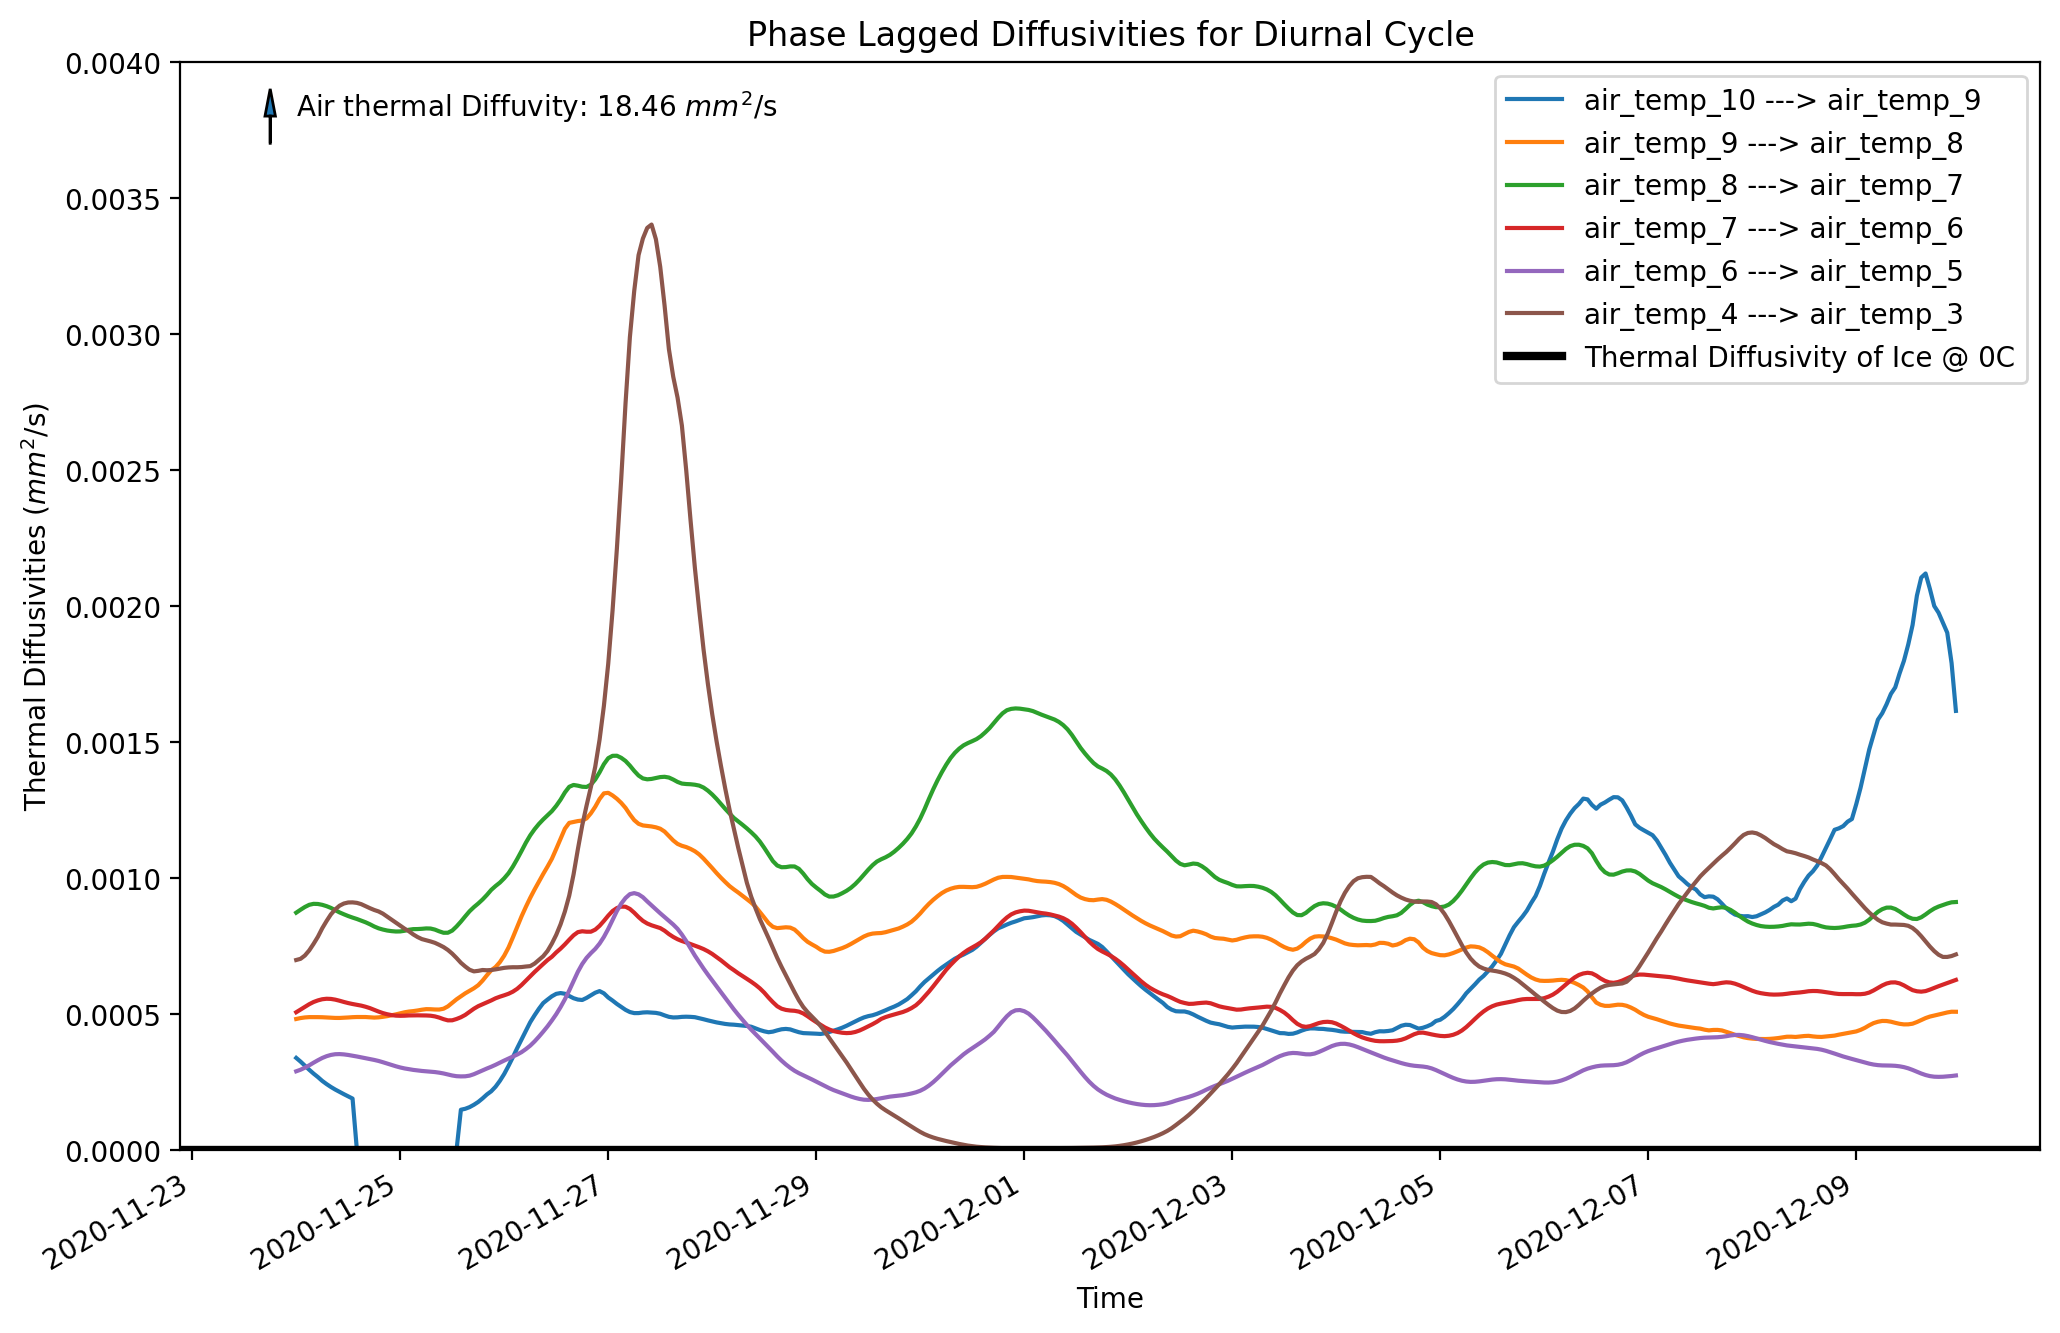

In [3]:
plt.rcParams['text.usetex'] = False
fig, ax = plt.subplots(figsize = (12,8), dpi = 200)
cols = [c for c in df.columns if c !='air_temp_3 ---> air_temp_2']
cols = [c for c in cols if c !='air_temp_5 ---> air_temp_4']
(df*1e3)[cols][df.index > pd.to_datetime('2020-11-24')].plot(ax = ax)
ax.set_ylim(0, 4e-3)
ax.text(pd.to_datetime('2020-11-24'), 0.0038, 'Air thermal Diffuvity: 18.46 $mm^{2}$/s')
ax.arrow(pd.to_datetime('2020-11-23 18:00'), 0.0037, 0, 0.0002, length_includes_head = True, head_length = 0.0001, head_width = 0.1)
ax.axhline(1e-7, color = 'black', linewidth = 3, label = 'Thermal Diffusivity of Ice @ 0C')
plt.legend()
plt.title('Phase Lagged Diffusivities for Diurnal Cycle')
plt.ylabel('Thermal Diffusivities ($mm^{2}$/s)')
phase_fig_dir = '/Users/zachkeskinen/Documents/temp/figures/phase_diffusivities'
plt.savefig(join(phase_fig_dir, 'clear_sub_test.png'))
